<a href="https://colab.research.google.com/github/zahraDehghanian97/stock_market/blob/master/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep Learing model in Keras
Implementation Steps:
 1- Data preparation (Train/Validation/Test)
 2- Crrating layers and model
 3- Setting training parameters (Loss & optimization function ,...)
 4- Train the model (using fit())


In [14]:
from keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels)=mnist.load_data()

In [15]:
X_train=train_images.reshape(60000,784)
X_test=test_images.reshape(10000,784)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255

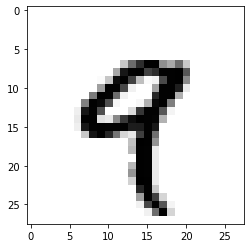

In [ ]:
import matplotlib.pyplot as plt
digit=train_images[4]
plt.imshow(digit,cmap='binary')

In [ ]:
my_data=train_images[10:100]
print(my_data.ndim)
print(my_data.shape)
print(my_data.dtype)


3
(90, 28, 28)
uint8


In [ ]:
import glob
import cv2
import numpy as np


In [ ]:
! curl -L https://api.github.com/repos/zahraDehghanian97/stock_market/tarball --output repo.tar
! tar xf repo.tar --wildcards "*/I_Train/*.png" --strip-components=1 
! tar xf repo.tar --wildcards "*/I_Trainnot/*.png" --strip-components=1 
! rm -rf repo.tar


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 15.5M    0 15.5M    0     0  7476k      0 --:--:--  0:00:02 --:--:-- 5960k


In [ ]:
images=glob.glob("T_Image"+"/*.png")
labels=glob.glob("I_Trainnot"+"/*.png")


In [ ]:
X=[]
width=200
heigh=100
for img in images:
  image=cv2.imread(img)
  image=cv2.resize(image,(width,heigh))
  image= image/np.max(image)
  image=image.astype(np.float32)
  X.append(image)

In [ ]:
Y=[]
out_width=200
out_heigh=100
nClasses=12
seg_labels=np.zeros([out_heigh,out_width,nClasses],dtype='uint8')
for mask in labels:
  label=cv2.imread(mask)
  label=cv2.resize(label,(out_width,out_heigh))
  label= label[:,:,0]
  for c in range(nClasses):
    seg_labels[:,:,c]=(label==c)
  label=label.astype(np.uint8)
  Y.append(label)

In [ ]:
np.max(image)


1.0

In [ ]:
pip install opencv-python

In [16]:
from keras.utils import np_utils
Y_train= np_utils.to_categorical(train_labels)
Y_test= np_utils.to_categorical(test_labels)

Creating Model

In [22]:
from keras.models import Sequential
from keras.layers import Dense , Dropout
from keras.losses import categorical_crossentropy
from keras.optimizers import  SGD
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np

(train_images, train_labels),(test_images, test_labels)=mnist.load_data()
Y_train= np_utils.to_categorical(train_labels)
Y_test= np_utils.to_categorical(test_labels)

myModel= Sequential()
myModel.add(Dense(500,activation='relu',input_shape=(784,)))
myModel.add(Dropout(0.2))
myModel.add(Dense(100,activation='relu'))
myModel.add(Dropout(0.2))
myModel.add(Dense(10,activation='softmax'))
myModel.summary()
myModel.compile(optimizer=SGD(lr=0.01),loss=categorical_crossentropy,metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 500)               392500    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               50100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1010      
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________


Plat


In [33]:
def plot_history(net_history):
    history=net_history.history
    losses=history['loss']
    accuracies=history['acc']
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(losses)
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(accuracies)


Train

In [23]:
network_history=myModel.fit(X_train,Y_train,batch_size=128,epochs=20,validation_split=0.2)


Epoch 1/20
375/375 [==============================] - 4s 11ms/step - loss: 1.7600 - accuracy: 0.4526 - val_loss: 0.6419 - val_accuracy: 0.8587
Epoch 2/20
375/375 [==============================] - 4s 10ms/step - loss: 0.7257 - accuracy: 0.7924 - val_loss: 0.4293 - val_accuracy: 0.8893
Epoch 3/20
375/375 [==============================] - 4s 10ms/step - loss: 0.5491 - accuracy: 0.8410 - val_loss: 0.3578 - val_accuracy: 0.9041
Epoch 4/20
375/375 [==============================] - 4s 10ms/step - loss: 0.4724 - accuracy: 0.8627 - val_loss: 0.3203 - val_accuracy: 0.9120
Epoch 5/20
375/375 [==============================] - 4s 10ms/step - loss: 0.4237 - accuracy: 0.8772 - val_loss: 0.2940 - val_accuracy: 0.9182
Epoch 6/20
375/375 [==============================] - 4s 10ms/step - loss: 0.3784 - accuracy: 0.8916 - val_loss: 0.2749 - val_accuracy: 0.9227
Epoch 7/20
375/375 [==============================] - 4s 10ms/step - loss: 0.3613 - accuracy: 0.8951 - val_loss: 0.2599 - val_accuracy: 0.9275

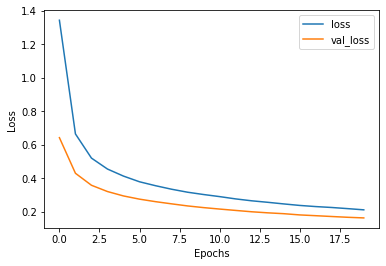

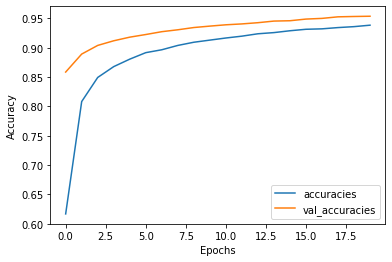

In [25]:
#plot_history(network_history)
history=network_history.history
accuracies=history['accuracy']
val_loss= history['val_loss']
val_accuracy=history['val_accuracy']
losses=history['loss']
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(losses)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(accuracies)
plt.plot(val_accuracy)
plt.legend(['accuracies','val_accuracies'])


In [28]:
test_loss,test_accuracy=myModel.evaluate(X_test,Y_test)
test_label_p=myModel.predict(X_test,)
test_label_p=np.argmax(test_label_p,axis=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.1636 - accuracy: 0.9520


In [31]:
myModel.layers[0].get_config()

{'activation': 'relu',
 'activity_regularizer': None,
 'batch_input_shape': (None, 784),
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'dtype': 'float32',
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'kernel_regularizer': None,
 'name': 'dense_15',
 'trainable': True,
 'units': 500,
 'use_bias': True}

In [27]:
test_loss

0.16360008716583252